In [1]:
import pandas as pd
data = pd.read_csv('mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [2]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

<AxesSubplot:>

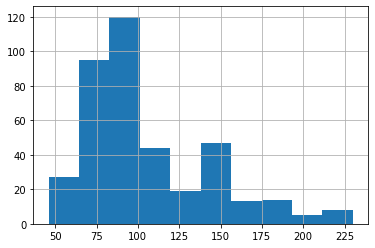

In [3]:
data['horsepower'].hist()

In [4]:
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].mean())

In [5]:
data.drop('name',1,inplace=True)

In [6]:
# creating instance of one-hot-encoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(data[['origin']]).toarray())
# merge with main df bridge_df on key values
data = data.join(enc_df)
data.drop('origin',1,inplace=True)
for i in [0,1,2]:
    data[i] = data[i].astype('int')
data.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,0,1,2
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1


In [7]:
mpg = data['mpg']
data = data.drop('mpg',1)

In [8]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(data,mpg,test_size=0.2,random_state=1111)

In [10]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(dtr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79259535 0.71711575 0.79593433 0.75039852 0.85888009]
0.7829848059425025


In [11]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [12]:
pred = dtr.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,pred)
mse

10.499999999999998

In [14]:
y_test[:5]

83     28.0
113    21.0
65     14.0
127    19.0
1      15.0
Name: mpg, dtype: float64

In [15]:
pred[:5]

array([31.5, 20. , 15. , 18. , 14. ])